__Хоружий Кирилл__, Б02-929

задание по ВычМатам к __A2__

20.09.2021

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import load_dataset
from scipy.optimize import curve_fit

## Первая задача

In [47]:
def GetLinearCoefs(x, y):
    w1 = np.cov([x, y])[0,1] / np.var(x)
    w0 = np.mean(y) - w1 * np.mean(x)
    return w1, w0

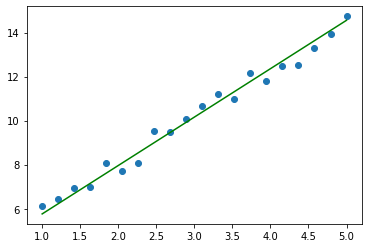

true:  2.00          x +  4.00
calc: (2.20 +- 0.07) x + (3.57 +- 0.22)


In [48]:
# Не уверен, что просили сделать именно это.
true_w1 = 2
true_w0 = 4
s = 0.4
l = 20

x = np.linspace(1, 5, l)
y = x * true_w1 + true_w0 + \
    np.random.normal(0, s, size=x.shape)

w1, w0 = GetLinearCoefs(x, y)

dw1 = s / np.sqrt(l  * np.var(x))
dw0 = s * np.mean(x) / np.sqrt(l  * np.var(x))

plt.plot(x, w1 * x + w0, color="g")
plt.scatter(x, y)
plt.show()

print("true:  {:.2f}          x +  {:.2f}".format(true_w1, true_w0))
print("calc: ({:.2f} +- {:.2f}) x + ({:.2f} +- {:.2f})".format(w1,dw1,w0,dw0))

## Вторая задача

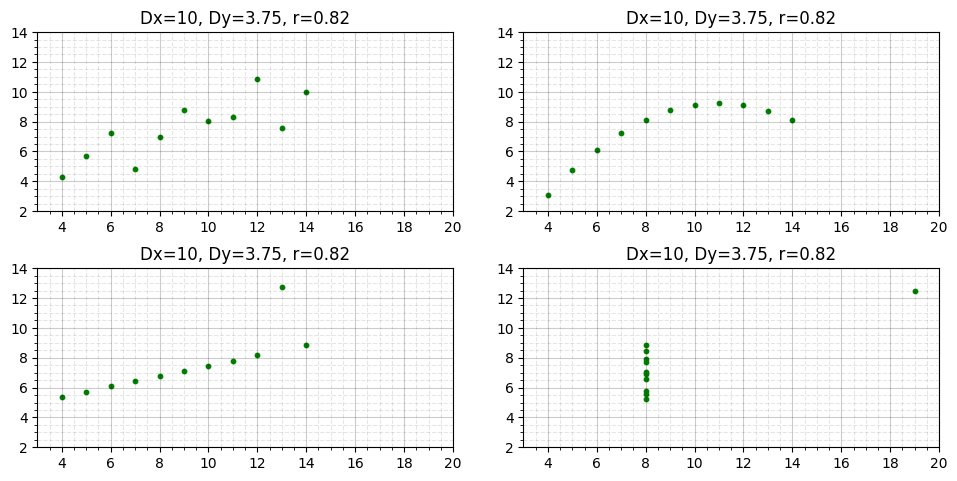

In [42]:
data = load_dataset("anscombe")
m1 = data["dataset"] == "I"
m2 = data["dataset"] == "II"
m3 = data["dataset"] == "III"
m4 = data["dataset"] == "IV"

def GetPlot(m, i,j):
    global axs;
    x = data[m]["x"]
    y = data[m]["y"]
    axs[i][j].set_title("Dx={:.0f}, Dy={:.2f}, r={:.2f}".format(np.var(x), np.var(y), np.corrcoef(x, y)[0,1]))
    axs[i][j].scatter(x, y, color="g", s=10)
    axs[i][j].set_xlim(3, 20)
    axs[i][j].set_ylim(2, 14)
    
    axs[i][j].minorticks_on()
    axs[i][j].grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
    axs[i][j].grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)

fig, axs = plt.subplots(2, 2, figsize=(10, 5), dpi=100)
fig.tight_layout(pad=2)

GetPlot(m1, 0, 0)
GetPlot(m2, 0, 1)
GetPlot(m3, 1, 0)
GetPlot(m4, 1, 1)
plt.show()

## Третья задача

В _переопределенной_ задаче получалось:
$$
    \mathcal{L} = \|\tilde{y} - y\|^2, 
    \ \ \ \ \Rightarrow \ \ \ \
    \partial_w \mathcal{L} = 2 X^{T} (X w - y) = 0,
    \ \ \ \ \Rightarrow \ \ \ \
    X^T X w = X^T y,
$$
где $\tilde{y} = X w$ -- предсказание. Так приходили к выражению
$$
    w = (X^T X)^{-1} X^T y.
$$

В _недоопределенной_ задаче получается (с учётом $L_2$ регуляризации):
$$
    \mathcal{L} = \|\tilde{y} - y\|^2 + w^T w, 
    \ \ \ \ \Rightarrow \ \ \ \
    \partial_w L = 2 X^{T} X w - 2 X^{T} y + 2 E w= 0,
    \ \ \ \ \Rightarrow \ \ \ \
    (X^T X+E) w = X^T y,
$$
где $E$ -- единичная матрица. Так приходим к выражению
$$
    w = (X^T X + E)^{-1} X^T y.
$$

## Четвертая задача

In [43]:
# данные из лабораторной работы 5.8.1
data = pd.read_excel("data_5.8.1.xlsx")

T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]

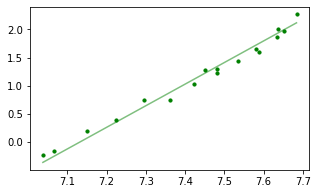

In [54]:
y = np.log(U * I)
x = np.log(T+273)

# пользуемся функцией из первой задачи
w1, w0 = GetLinearCoefs(x, y)

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x, w1 * x + w0, color="g", alpha=0.5)
ax.scatter(x, y, s=10, color="g")

plt.show()

## Пятая задача

см. [pdf-файл](https://github.com/k1242/notes_5sem/blob/main/comp_math/theory_hw/comp_math_hw.pdf) с заданием